<a href="https://colab.research.google.com/github/monikabril/datathonwids2019/blob/master/Datathon2019_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Para el primer envio se utilizara Pytorch

In [0]:
# Required libraries
import json 
import zipfile
import os
import pandas as pd
from PIL import Image
import random

In [0]:
root_path = '/content'

In [9]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ‘/root/.kaggle/kaggle.json’
###############################################
# IMPORTANTE 
# Copia en la siguiente línea el contenido de tu archivo kaggle.json 
api_token = {"username":"monica123","key":"5912ca2a6213bf68ecfba9af3532c0e7"}
###############################################
with open('/root/.kaggle/kaggle.json', 'w') as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
touch: cannot touch '‘/root/.kaggle/kaggle.json’': No such file or directory


In [10]:
!kaggle competitions download -c widsdatathon2019

500 - Internal Server Error


In [0]:
for file in os.listdir():
 if file.endswith('.zip'):
  zip_ref = zipfile.ZipFile(file, 'r')
  zip_ref.extractall()
  zip_ref.close()

In [7]:
df_training = pd.read_csv(root_path+'/traininglabels.csv')
tr_nsamples = len(df_training)
print("Nro de registros en el dataset de training: ", tr_nsamples)
df_training.head()

FileNotFoundError: ignored

Sample id: 8798
image_id       img_018802018.jpg
has_oilpalm                    0
score                          1
Name: 8798, dtype: object


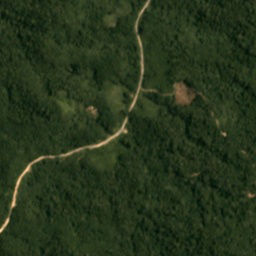

In [0]:
# Visualize random samples
n_sample = random.randint(1,(tr_nsamples - 1))
print("Sample id:", n_sample)
print(df_training.iloc[n_sample])
Image.open(root_path+'/train_images/'+df_training.iloc[n_sample]['image_id'])

In [1]:
tr_path = root_path+'/training_ready'
tr_path_train_im = root_path+'/train_images'
os.makedirs(tr_path, exist_ok=True)
for index, row in df_training.iterrows():
 tr_class = row['has_oilpalm']
 tr_image = row['image_id']
 # Create the class folder if it doesn’t exists yet.
 os.makedirs(tr_path+'/'+str(tr_class), exist_ok=True)
 # Copy files
 os.system('cp '+tr_path_train_im+'/'+tr_image+' '+tr_path+'/'+str(tr_class)+'/'+tr_image)

NameError: ignored